In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import random
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import statsmodels.stats.multitest as mc
from scipy.stats import hypergeom

In [3]:
CD = pd.read_csv('~/Desktop/Metaphlan4_MGX_CD.csv').set_index('Abundance').T
UC = pd.read_csv('~/Desktop/Metaphlan4_MGX_UC.csv').set_index('Abundance').T
Control = pd.read_csv('~/Desktop/Metaphlan4_MGX_Control.csv').set_index('Abundance').T

In [4]:
CD['diagnosis'] = 'CD'
UC['diagnosis'] = 'UC'
Control['diagnosis'] = 'Control'
Metaphlan4 = pd.concat([CD,UC,Control])
Metaphlan4

Abundance,k__Bacteria,p__Firmicutes,p__Bacteroidetes,p__Proteobacteria,p__Actinobacteria,c__Clostridia,c__Bacteroidia,c__Negativicutes,c__Firmicutes_unclassified,c__Betaproteobacteria,...,t__SGB47522,g__GGB3171,s__GGB3171_SGB4185,t__SGB4185,s__Slackia_piriformis,t__SGB14779,s__Bacteroidales_bacterium_KA00251,s__Parvimonas_sp_KA00067,t__SGB3324,t__SGB6648
PSM7J14T,100.00000,71.02855,26.85212,1.89661,0.22272,55.95542,26.85212,12.28881,2.64634,0.98112,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM79HOL,100.00000,34.80297,63.49096,1.49113,0.21495,30.54465,63.49096,2.56962,0.32024,1.44817,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM67U9D,100.00000,54.68728,44.23327,0.82266,0.25679,50.51548,44.23327,2.28682,0.51562,0.73302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSM6J2MF,100.00000,96.47442,0.24335,3.10878,0.16437,82.71787,0.24335,13.23502,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HSM7J4N4,100.00000,27.30707,71.32484,1.35394,0.01415,25.32084,71.32484,1.39104,0.44382,0.01219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MSMA26BL,100.00000,36.18427,61.89923,1.72077,0.19572,34.43199,61.89923,1.54756,0.03789,1.05422,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
MSM79H9A,99.84673,36.69046,58.88541,0.98279,0.58879,33.53007,58.88541,0.38769,0.00567,0.04974,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
HSM7J4KK,100.00000,33.89929,62.37670,1.84729,0.81156,31.61819,62.23758,0.55590,0.16380,0.93262,...,0.0,0.0,0.0,0.0,0.00439,0.00439,NaN,NaN,NaN,NaN
MSM79HC4,100.00000,80.54021,16.09695,0.89052,0.68033,75.44387,16.09695,3.38109,1.36633,0.73091,...,0.0,0.0,0.0,0.0,0.00000,0.00000,NaN,NaN,NaN,NaN


In [5]:
select_sampels = pd.read_csv('~/Desktop/selected_samples_MGX.csv')
select_sampels = select_sampels.set_index('External ID')
select_sampels.drop("Participant ID", inplace=True, axis=1)

In [6]:
Metaphlan4 = Metaphlan4.loc[select_sampels.index,:]
Metaphlan4 = Metaphlan4.loc[:,Metaphlan4.columns.str.startswith('s__')]
Metaphlan4["diagnosis"] = select_sampels.iloc[:,-1]
# Metaphlan4.reset_index(inplace=True)
Metaphlan4

Abundance,s__Phocaeicola_vulgatus,s__Eubacterium_rectale,s__Dialister_invisus,s__Roseburia_faecis,s__Roseburia_inulinivorans,s__Faecalibacterium_prausnitzii,s__Bacteroides_xylanisolvens,s__Firmicutes_bacterium_AF16_15,s__Bacteroides_uniformis,s__Ruminococcus_bromii,...,s__Streptococcus_agalactiae,s__Faecalicoccus_pleomorphus,s__Streptococcus_dysgalactiae,s__Corynebacterium_accolens,s__GGB39918_SGB47522,s__GGB3171_SGB4185,s__Slackia_piriformis,s__Bacteroidales_bacterium_KA00251,s__Parvimonas_sp_KA00067,diagnosis
External ID,,,,,,,,,,,,,,,,,,,,,
CSM67UA2,36.02530,0.00000,1.91898,1.34449,0.03810,0.90627,0.00000,0.00000,17.15467,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD
CSM5MCVN,51.31297,0.95498,1.54371,0.04588,0.00000,0.00000,7.95270,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD
CSM67UBZ,0.00313,0.00000,0.00000,0.00000,0.00000,10.84042,1.39625,0.00000,16.65207,1.02143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UC
CSM5MCXL,32.29455,3.46622,0.00000,0.00000,0.71850,2.63304,0.00904,0.00000,12.83634,0.12034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UC
CSM5MCY8,0.00000,0.56787,0.00000,0.00000,0.30914,2.20589,0.00000,0.00000,8.33000,0.22200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSM7J19N,5.47393,1.38623,0.00000,0.02240,0.60937,4.65083,0.00000,0.71590,4.14365,0.00000,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,nonIBD
PSM6XBW3,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,nonIBD
PSM7J12J,0.00515,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CD


In [7]:
M_CD_B = Metaphlan4[Metaphlan4['diagnosis'] == "CD"].drop("diagnosis",axis=1)
M_UC_B = Metaphlan4[Metaphlan4['diagnosis'] == "UC"].drop("diagnosis",axis=1)
M_Control_B = Metaphlan4[Metaphlan4['diagnosis'] == "nonIBD"].drop("diagnosis",axis=1)
M_CD_B

Abundance,s__Phocaeicola_vulgatus,s__Eubacterium_rectale,s__Dialister_invisus,s__Roseburia_faecis,s__Roseburia_inulinivorans,s__Faecalibacterium_prausnitzii,s__Bacteroides_xylanisolvens,s__Firmicutes_bacterium_AF16_15,s__Bacteroides_uniformis,s__Ruminococcus_bromii,...,s__GGB2734_SGB3677,s__Streptococcus_agalactiae,s__Faecalicoccus_pleomorphus,s__Streptococcus_dysgalactiae,s__Corynebacterium_accolens,s__GGB39918_SGB47522,s__GGB3171_SGB4185,s__Slackia_piriformis,s__Bacteroidales_bacterium_KA00251,s__Parvimonas_sp_KA00067
External ID,,,,,,,,,,,,,,,,,,,,,
CSM67UA2,36.02530,0.00000,1.91898,1.34449,0.03810,0.90627,0.00000,0.00000,17.15467,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM5MCVN,51.31297,0.95498,1.54371,0.04588,0.00000,0.00000,7.95270,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM5MCZ3,0.00000,0.00000,0.00000,0.30479,0.19031,0.00000,0.00000,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM5MCWE,0.00000,0.00000,0.00000,0.77226,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM67UCK,14.39624,0.00000,0.00000,0.50987,0.00000,16.62301,1.25564,0.00000,9.14593,0.02199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM5MCZF,16.56186,5.87824,0.00000,3.77646,0.69644,18.24435,0.00000,0.08565,18.67945,0.55186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM67UB1,26.28361,0.05007,0.98187,0.03832,0.01534,4.02696,2.37736,0.00000,2.38708,0.09588,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM67UBB,0.00359,0.17720,0.00000,0.00000,0.00000,7.61430,2.65299,0.16354,0.00000,0.93762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CSM79HH8,7.72936,0.48122,0.00000,0.00000,0.00000,0.01443,2.64679,0.00000,4.68568,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Deletes all values smaller than the threshold value

In [8]:
Threshold = 0.1
M_CD = M_CD_B[M_CD_B >= Threshold]
M_UC = M_UC_B[M_UC_B >= Threshold]
M_Control = M_Control_B[M_Control_B >= Threshold]
print(f'Dim_CD:{M_CD.shape}\tDim_UC:{M_UC.shape}\tDim_Control:{M_Control.shape}')

Dim_CD:(36, 1218)	Dim_UC:(24, 1218)	Dim_Control:(23, 1218)


Replace NaN Values with Zero


In [9]:
###########
M_CD = M_CD.fillna(0)
M_CD[M_CD >= Threshold] = 1
M_CD[M_CD < Threshold] = 0
###########
M_UC = M_UC.fillna(0)
M_UC[M_UC >= Threshold] = 1
M_UC[M_UC < Threshold] = 0
###########
M_Control = M_Control.fillna(0)
M_Control[M_Control >= Threshold] = 1
M_Control[M_Control < Threshold] = 0

In [10]:
M_CD = M_CD.loc[:,(M_CD.sum() > M_CD.shape[0] * 0.1) & (M_CD.sum() < M_CD.shape[0]*0.9)]
M_UC = M_UC.loc[:, (M_UC.sum() > M_UC.shape[0] * 0.1)  & (M_UC.sum() < M_UC.shape[0]*0.9)]
M_Control = M_Control.loc[:, (M_Control.sum() > M_Control.shape[0] * 0.1)  & (M_Control.sum() < M_Control.shape[0]*0.9)]
print(f'Dim_CD:{M_CD.shape}\tDim_UC:{M_UC.shape}\tDim_Control:{M_Control.shape}')

Dim_CD:(36, 103)	Dim_UC:(24, 108)	Dim_Control:(23, 120)


In [11]:
random.seed(8)
M_CD_R = M_CD.apply(lambda x: np.random.permutation(x),)
M_UC_R = M_UC.apply(lambda x: np.random.permutation(x))
M_Control_R  = M_Control.apply(lambda x: np.random.permutation(x))

In [12]:
def jaccard_pval_formula(x, y):
    k = np.sum(x & y)
    nx, ny = np.sum(x), np.sum(y)
    if nx < ny:
        nx, ny = ny, nx

    rv = hypergeom(x.size, nx, ny)
    return np.sum(rv.pmf(np.arange(k, ny+1)))

def create_jaccard_pvals_table(df):
    # get the column names of the DataFrame
    col_names = df.columns
    result = pd.DataFrame({"Species1": ["None"], "Species2": ["None"], "Jaccard": [-1.0], "Pval": [-1.0]})
    for i in range(len(df.columns)):
        col1 = col_names[i]
        a = np.array(df[col1])
        for j in range(i+1, len(df.columns)):
            col2 = col_names[j]
            b = np.array(df[col2])
            jaccard = float(np.sum(a & b)/np.sum(a | b))
            pval = jaccard_pval_formula(a, b)

            newRow = pd.DataFrame({"Species1": [col1], "Species2": [col2], "Jaccard": [jaccard], "Pval": [pval]})
            result = pd.concat([result, newRow])
    result = result.iloc[1:result.shape[0], :].sort_values(by="Pval")
    result["FDR"] = mc.fdrcorrection(result["Pval"])[1]
    result.index = range(0, result.shape[0])
    return result

In [48]:
j_CD = M_CD.astype(int)
j_UC = M_UC.astype(int)
j_Control = M_Control.astype(int)
T_CD = create_jaccard_pvals_table(j_CD)
T_UC = create_jaccard_pvals_table(j_UC)
T_Control = create_jaccard_pvals_table(j_Control)

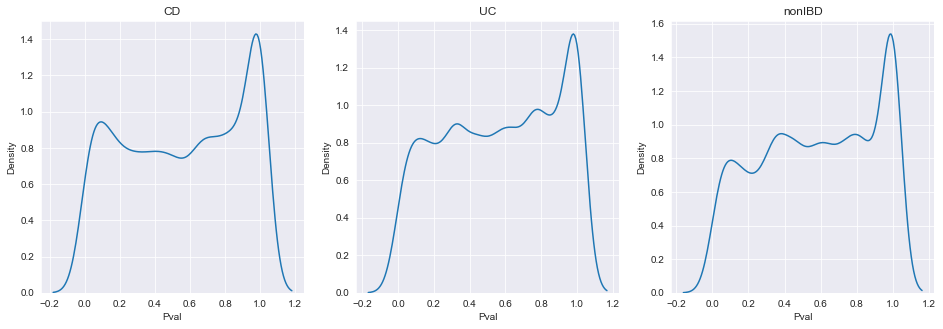

In [54]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
plt.title("CD")
sns.kdeplot(T_CD.Pval)

plt.subplot(1,3,2)
plt.title("UC")
sns.kdeplot(T_UC.Pval)

plt.subplot(1,3,3)
plt.title("nonIBD")
sns.kdeplot(T_Control.Pval)
plt.show()

In [21]:
M = T_CD.loc[T_CD.Pval <= 0.1]
M

,Species1,Species2,Jaccard,Pval,FDR
0,s__Oscillibacter_sp_ER4,s__GGB9615_SGB15053,0.666667,0.000012,0.062060
1,s__Faecalibacterium_prausnitzii,s__Bacteroides_caccae,0.777778,0.000053,0.119943
2,s__Oscillibacter_sp_ER4,s__Lachnospira_eligens,0.588235,0.000077,0.119943
3,s__Blautia_obeum,s__Oscillibacter_sp_ER4,0.600000,0.000108,0.119943
4,s__Parabacteroides_merdae,s__Bacteroides_caccae,0.681818,0.000114,0.119943
...,...,...,...,...,...
497,s__Faecalibacterium_prausnitzii,s__Anaerostipes_hadrus,0.428571,0.076386,0.799709
498,s__Bacteroides_uniformis,s__Clostridium_sp_AF36_4,0.269231,0.078800,0.799709
499,s__Oscillibacter_sp_ER4,s__Roseburia_hominis,0.333333,0.078851,0.799709
500,s__Eubacterium_siraeum,s__Lacrimispora_amygdalina,0.333333,0.078851,0.799709


In [16]:
print(sum(M_CD.s__Flavonifractor_plautii > 0.1))
print(sum((M_CD.s__Flavonifractor_plautii > 0.1)*(M_CD.s__Dysosmobacter_welbionis > 0.1)))
# sum(M_CD.s__Dysosmobacter_welbionis > 0.1)

21
17


In [17]:
Cluster_CD = Metaphlan4.loc[:,['s__Dysosmobacter_welbionis','s__Flavonifractor_plautii']]

In [18]:
Name_Hierarchical_CD = pd.read_csv('~/Desktop/Metaphlan4_set_species_CD.csv')
Name_Hierarchical_CD.set_index('Unnamed: 0',inplace=True)
sum_samples = pd.DataFrame(M_CD.sum())
HCD = Cluster_CD.T.join(sum_samples)
Hierarchical_CD = HCD.join(Name_Hierarchical_CD)
Hierarchical_CD.rename(columns={Hierarchical_CD.columns[-1]:'Hierarchical', Hierarchical_CD.columns[-2]:'Sum_Samples'}, inplace=True)
Hierarchical_CD

,CSM67UA2,CSM5MCVN,CSM67UBZ,CSM5MCXL,CSM5MCY8,CSM5MCX3,CSM5MCZ3,CSM5MCWE,CSM67UCK,CSM67UEW,...,PSM6XBT3,PSM7J14X,PSM7J19F,PSM7J19N,PSM6XBW3,PSM7J12J,PSM7J1BX,PSMA264O,Sum_Samples,Hierarchical
Abundance,,,,,,,,,,,,,,,,,,,,,
s__Dysosmobacter_welbionis,1.01564,0.00000,0.40071,1.67904,0.73681,0.07861,0.62252,4.82675,0.09141,0.02074,...,0.24466,0.42869,0.47976,0.14108,0.00000,0.00000,0.34516,0.00486,21.0,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
s__Flavonifractor_plautii,1.27997,0.71989,0.15991,1.35344,0.21178,0.02331,0.87682,0.91283,0.00000,0.00000,...,0.11067,0.03173,0.51072,0.00421,3.28992,0.96176,0.02811,0.44295,21.0,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...
